<a href="https://colab.research.google.com/github/Ninja7328/ML-Practicing/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [3]:
np.random.seed(42)
n_samples = 1000
time_steps = 10
n_features = 1

X = np.random.randn(n_samples, time_steps, n_features)
print(X.shape)

(1000, 10, 1)


In [4]:
# sequence is 1000, features is 1 and the input is 10 to take input

print(X[0,:,:])

[[ 0.49671415]
 [-0.1382643 ]
 [ 0.64768854]
 [ 1.52302986]
 [-0.23415337]
 [-0.23413696]
 [ 1.57921282]
 [ 0.76743473]
 [-0.46947439]
 [ 0.54256004]]


In [5]:
Y = np.sum(X, axis=1)
print(Y.shape)

(1000, 1)


In [6]:
split = int(0.8*len(X))
print(split)

800


In [7]:
xtrain,xtest = X[:split],X[split:]
ytrain,ytest = Y[:split],Y[split:]

In [8]:
model_RNN = Sequential([
    SimpleRNN(50,activation='relu',input_shape=(time_steps,n_features)),
    Dense(1)
])

In [9]:
model_RNN.compile(optimizer='adam', loss='mse')

In [12]:
history = model_RNN.fit(xtrain,ytrain,epochs=50,validation_data=(xtest,ytest))

Epoch 1/50
25/25 [==============================] - 0s 6ms/step - loss: 0.0160 - val_loss: 0.0077
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0104 - val_loss: 0.0232
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0057 - val_loss: 0.0054
Epoch 4/50
25/25 [==============================] - 0s 5ms/step - loss: 0.0041 - val_loss: 0.0073
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.0079
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0050 - val_loss: 0.0132
Epoch 7/50
25/25 [==============================] - 0s 5ms/step - loss: 0.0041 - val_loss: 0.0053
Epoch 8/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 0.0099
Epoch 9/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0046 - val_loss: 0.0060
Epoch 10/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0032 - val_loss: 0.0044
Epoch 11/50
25/25 [

Text(0, 0.5, 'loss')

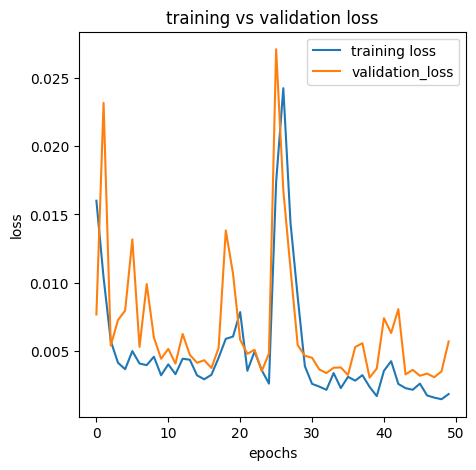

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5,5))
plt.title("training vs validation loss")
plt.plot(np.arange(50),history.history['loss'],label='training loss')
plt.plot(np.arange(50),history.history['val_loss'],label='validation_loss')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")